Mọi người vào drive của mình rồi thêm thư mục KHDL rồi dán file all_hotel.csv vào nha.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/KHDL/')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KHDL/all_hotel_new.csv')
print(df.info())
# Xử lý dữ liệu
# Tập dữ liệu hotel_all có 19315 dòng
# Sau khi loại bỏ các dòng không có điểm đánh giá: còn 16190 
df.dropna(subset=['Point'], inplace=True)
print(df.info())
# Điền dữ liệu trống cho level = 0: 
df['Sustainable_level'].fillna(0, inplace=True)
print(df.info())
# Sau khi loại bỏ các dòng thiếu >1 thuộc tính: còn 15104 
# Tạo cột mới là số cột bị thiếu
df['Missing'] = df.isnull().sum(axis=1)
# xoá các hàng có số cột bị thiếu > 1
df = df[df['Missing'] <= 1]
df.drop(columns=['Missing'], inplace=True)  
print(df)
print(df.info())
df.to_csv('/content/drive/MyDrive/KHDL/hotel_all_after_new.csv', index=False, encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19315 entries, 0 to 19314
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            19315 non-null  object 
 1   Place              19315 non-null  object 
 2   Name               19315 non-null  object 
 3   Price              19315 non-null  object 
 4   Tax                19315 non-null  object 
 5   Stars              8434 non-null   float64
 6   Distance           16056 non-null  object 
 7   Number_of_review   16333 non-null  object 
 8   Sustainable_level  4569 non-null   object 
 9   Discount           19315 non-null  bool   
 10  Free_Breakfast     19315 non-null  bool   
 11  is_Prepayment      19315 non-null  bool   
 12  is_NotablePlace    19315 non-null  bool   
 13  is_Free_Cancel     19315 non-null  bool   
 14  is_Sold_Out        19315 non-null  bool   
 15  Point              16190 non-null  object 
dtypes: bool(6), float64(1)

<ipython-input-4-a71954aa82b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Missing'], inplace=True)


In [ ]:
import pandas as pd
import re

# Đọc file .csv vào DataFrame
df = pd.read_csv('/content/drive/MyDrive/KHDL/hotel_all_after.csv')
df.info()

# Xử lý thuộc tính "Tax"
# df['Tax'] = df['Tax'].str.extract('(\d+\.\d+|\d+)', expand=False) # Sử dụng biểu thức chính quy để tìm và lấy giá trị số trong chuỗi
df['Tax'] = df['Tax'].apply(lambda x: re.sub(r'[^\d]+', '', x))
df['Tax'] = df['Tax'].replace('', np.nan)
df['Tax'] = df['Tax'].astype(float)
# Điền dữ liệu NaN bằng giá trị 0
df['Tax'] = df['Tax'].fillna(0)

# Xử lý thuộc tính "Price" bằng biểu thức chính quy
# df['Price'] = df['Price'].str.extract(r'(\d+\.\d+|\d+)')
df['Price'] = df['Price'].apply(lambda x: re.sub(r'[^\d]+', '', x))
df['Price'] = df['Price'].astype(float)

# Chuyển đổi cột "Distance" sang kiểu dữ liệu chuỗi (string)
# df['Distance'] = df['Distance'].astype(str)

# Xử lý thuộc tính "Distance" bằng biểu thức chính quy
df['Distance'] = df['Distance'].str.extract(r'(\d+(?:,\d+)?)')

# Chuyển kiểu dữ liệu của thuộc tính "Distance" bằng kiểu Float
df['Distance'] = df['Distance'].str.replace(',', '.').astype(float)
# Chuẩn hoá dữ liệu của thuộc tính "Distance" về đơn vị km
df.loc[df['Distance'] >= 25, 'Distance'] /= 1000

# Xử lý thuộc tính "Number_of_review" bằng biểu thức chính quy
df['Number_of_review'] = df['Number_of_review'].str.extract(r'(\d+)')
df['Number_of_review'] = df['Number_of_review'].astype(int)

# Xử lý thuộc tính "Sustainable_level" bằng biểu thức chính quy
df['Sustainable_level'] = df['Sustainable_level'].str.extract(r'(\d+)')
df['Sustainable_level'].fillna(0, inplace=True)
df['Sustainable_level'] = df['Sustainable_level'].astype(int)

# Chuyển đổi kiểu dữ liệu của cột "Distance"
df['Discount'] = df['Discount'].replace({False: 0, True: 1})
df['Discount'] = df['Discount'].astype(int)

# Chuyển đổi kiểu dữ liệu của cột "Free_Breakfast"
df['Free_Breakfast'] = df['Free_Breakfast'].replace({False: 0, True: 1})
df['Free_Breakfast'] = df['Free_Breakfast'].astype(int)

# Chuyển đổi kiểu dữ liệu của cột "is_Prepayment"
df['is_Prepayment'] = df['is_Prepayment'].replace({False: 0, True: 1})
df['is_Prepayment'] = df['is_Prepayment'].astype(int)

# Chuyển đổi kiểu dữ liệu của cột "is_NotablePlace"
df['is_NotablePlace'] = df['is_NotablePlace'].replace({False: 0, True: 1})
df['is_NotablePlace'] = df['is_NotablePlace'].astype(int)

# Chuyển đổi kiểu dữ liệu của cột "is_Free_Cancel"
df['is_Free_Cancel'] = df['is_Free_Cancel'].replace({False: 0, True: 1})
df['is_Free_Cancel'] = df['is_Free_Cancel'].astype(int)

# Chuyển đổi kiểu dữ liệu của cột "is_Sold_Out"
df['is_Sold_Out'] = df['is_Sold_Out'].replace({False: 0, True: 1})
df['is_Sold_Out'] = df['is_Sold_Out'].astype(int)

# Ép kiểu dữ liệu của cột "Point" về kiểu float
df['Point'] = df['Point'].str.replace(',', '.').astype(float)
lower_Point=df['Point'].mean() - 3* df['Point'].std()
df.loc[df['Point']<=lower_Point,'Point']=lower_Point

df = df[df['Number_of_review']>=25]

df.to_csv('/content/drive/MyDrive/KHDL/BigDataHotelnew.csv', index=False)
# In DataFrame sau khi xử lý
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            15104 non-null  object 
 1   Place              15104 non-null  object 
 2   Name               15104 non-null  object 
 3   Price              15104 non-null  object 
 4   Tax                15104 non-null  object 
 5   Stars              8152 non-null   float64
 6   Distance           13280 non-null  object 
 7   Number_of_review   15104 non-null  object 
 8   Sustainable_level  15104 non-null  object 
 9   Discount           15104 non-null  bool   
 10  Free_Breakfast     15104 non-null  bool   
 11  is_Prepayment      15104 non-null  bool   
 12  is_NotablePlace    15104 non-null  bool   
 13  is_Free_Cancel     15104 non-null  bool   
 14  is_Sold_Out        15104 non-null  bool   
 15  Point              15104 non-null  object 
dtypes: bool(6), float64(1)

In [ ]:
# chay 2
df=pd.read_csv('/content/drive/MyDrive/KHDL/BigDataHotelnew.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            9486 non-null   object 
 1   Place              9486 non-null   object 
 2   Name               9486 non-null   object 
 3   Price              9486 non-null   float64
 4   Tax                9486 non-null   float64
 5   Stars              6178 non-null   float64
 6   Distance           8104 non-null   float64
 7   Number_of_review   9486 non-null   int64  
 8   Sustainable_level  9486 non-null   int64  
 9   Discount           9486 non-null   int64  
 10  Free_Breakfast     9486 non-null   int64  
 11  is_Prepayment      9486 non-null   int64  
 12  is_NotablePlace    9486 non-null   int64  
 13  is_Free_Cancel     9486 non-null   int64  
 14  is_Sold_Out        9486 non-null   int64  
 15  Point              9486 non-null   float64
dtypes: float64(5), int64(8),

,Country,Place,Name,Price,Tax,Stars,Distance,Number_of_review,Sustainable_level,Discount,Free_Breakfast,is_Prepayment,is_NotablePlace,is_Free_Cancel,is_Sold_Out,Point
0,Việt Nam,Hồ Chí Minh,Saigon View Hotel,250000.0,0.0,3.0,1.20,55,0,0,0,1,0,1,1,7.1
1,Việt Nam,Hồ Chí Minh,Cozrum Homes - Sonata Residence,672443.0,0.0,4.0,5.10,125,0,0,0,1,1,1,0,6.1
2,Việt Nam,Hồ Chí Minh,Singita Saigon Boutique Hotel,726158.0,0.0,4.0,0.90,48,0,1,1,0,0,0,0,8.6
3,Việt Nam,Hồ Chí Minh,Adora Art Hotel,720000.0,0.0,4.0,0.35,754,0,0,1,0,0,0,1,8.3
4,Việt Nam,Hồ Chí Minh,Oakwood Hotel & Apartments Saigon,1276275.0,0.0,4.0,4.20,167,0,0,0,1,0,1,0,8.7
5,Việt Nam,Hồ Chí Minh,LEHA Saigon Hotel Airport,747000.0,0.0,NaN,5.40,165,0,1,0,1,0,1,1,8.4
6,Việt Nam,Hồ Chí Minh,ZO APARTMENT MILLENNIUM - Free pool & gym,959200.0,348071.0,NaN,0.90,193,0,1,0,0,0,1,0,8.3
7,Việt Nam,Hồ Chí Minh,Apro Aparthotel Saigon Center,585000.0,0.0,3.0,2.60,25,0,1,0,0,0,1,0,7.8
8,Việt Nam,Hồ Chí Minh,RAMADA ENCORE BY WYNDHAM SAIGON D1 - Formerly ...,1386750.0,0.0,4.0,1.10,411,0,1,1,0,0,1,0,8.0
9,Việt Nam,Hồ Chí Minh,Homet Saigon RiverGate - Free Pool & Gym & Pic...,720000.0,100000.0,NaN,1.00,168,0,0,0,0,1,1,0,8.2


In [ ]:
import math
# tạo cột chia khoảng cho point
df['Scope_point'] = df['Point'].apply(lambda x: math.ceil(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            9486 non-null   object 
 1   Place              9486 non-null   object 
 2   Name               9486 non-null   object 
 3   Price              9486 non-null   float64
 4   Tax                9486 non-null   float64
 5   Stars              6178 non-null   float64
 6   Distance           8104 non-null   float64
 7   Number_of_review   9486 non-null   int64  
 8   Sustainable_level  9486 non-null   int64  
 9   Discount           9486 non-null   int64  
 10  Free_Breakfast     9486 non-null   int64  
 11  is_Prepayment      9486 non-null   int64  
 12  is_NotablePlace    9486 non-null   int64  
 13  is_Free_Cancel     9486 non-null   int64  
 14  is_Sold_Out        9486 non-null   int64  
 15  Point              9486 non-null   float64
 16  Scope_point        9486 

In [ ]:
# Lấy 1070 mẫu từ BigData để tạo file SmallData.csv
import math
from sklearn.model_selection import train_test_split
# tạo cột chia khoảng cho point
df['Scope_point'] = df['Point'].apply(lambda x: math.ceil(x))
df.info()
X=df.drop(columns=['Scope_point'])
y=df['Scope_point']
# Liệt kê các loại trong cột 'Scope_point' và số lượng từng loại
value_counts = df['Scope_point'].value_counts()
print(value_counts)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=2, stratify=y)
df_small = pd.concat([X_test, y_test], axis=1)
df_small.info()
df_small.to_csv('/content/drive/MyDrive/KHDL/SmallDataHotelnew.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            9486 non-null   object 
 1   Place              9486 non-null   object 
 2   Name               9486 non-null   object 
 3   Price              9486 non-null   float64
 4   Tax                9486 non-null   float64
 5   Stars              6178 non-null   float64
 6   Distance           8104 non-null   float64
 7   Number_of_review   9486 non-null   int64  
 8   Sustainable_level  9486 non-null   int64  
 9   Discount           9486 non-null   int64  
 10  Free_Breakfast     9486 non-null   int64  
 11  is_Prepayment      9486 non-null   int64  
 12  is_NotablePlace    9486 non-null   int64  
 13  is_Free_Cancel     9486 non-null   int64  
 14  is_Sold_Out        9486 non-null   int64  
 15  Point              9486 non-null   float64
 16  Scope_point        9486 

mean: 1081198.6222854734
upper-limit: 5195956.215964836
lower-limit: -3033558.9713938897


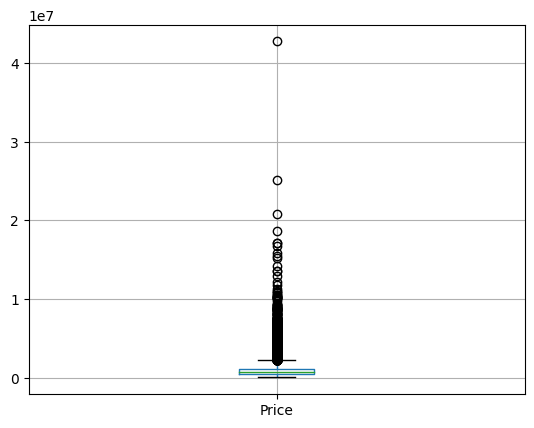

In [ ]:
figure=df.boxplot(column="Price")
print("mean:", df["Price"].mean())
print("upper-limit:", df.Price.mean() + 3*df.Price.std())
print("lower-limit:", df.Price.mean() - 3*df.Price.std())

mean: 33640.90870756905
upper-limit: 378153.9307393216
lower-limit: -310872.11332418345


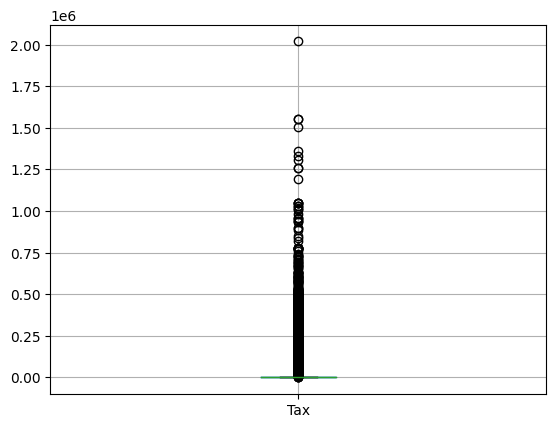

In [ ]:
figure=df.boxplot(column="Tax")
print("mean:", df["Tax"].mean())
print("upper-limit:", df.Tax.mean() + 3*df.Tax.std())
print("lower-limit:", df.Tax.mean() - 3*df.Tax.std())

mean: 3.266953440366972
upper-limit: 13.85724271938777
lower-limit: -7.323335838653826


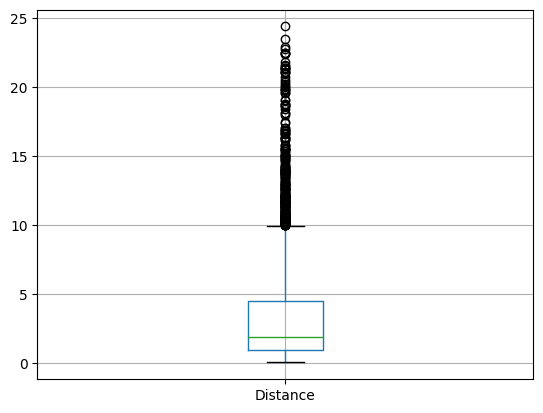

In [ ]:
figure=df.dropna().boxplot(column="Distance")
print("mean:", df.dropna()["Distance"].mean())
print("upper-limit:", df.dropna().Distance.mean() + 3*df.dropna().Distance.std())
print("lower-limit:", df.dropna().Distance.mean() - 3*df.dropna().Distance.std())

mean: 208.23740248787686
upper-limit: 804.5615081916219
lower-limit: -388.0867032158681


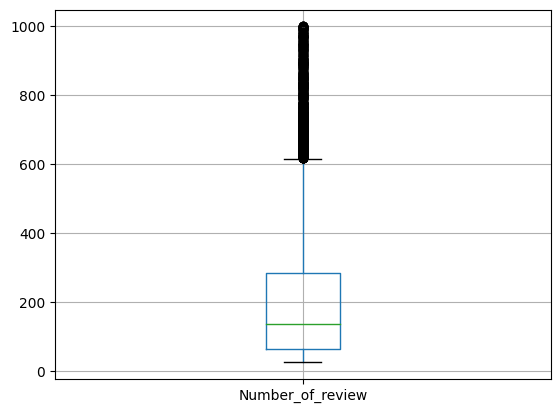

In [ ]:
figure=df.boxplot(column="Number_of_review")
print("mean:", df["Number_of_review"].mean())
print("upper-limit:", df.Number_of_review.mean() + 3*df.Number_of_review.std())
print("lower-limit:", df.Number_of_review.mean() - 3*df.Number_of_review.std())

mean: 8.30439790475058
upper-limit: 10.785071198900608
lower-limit: 5.823724610600552


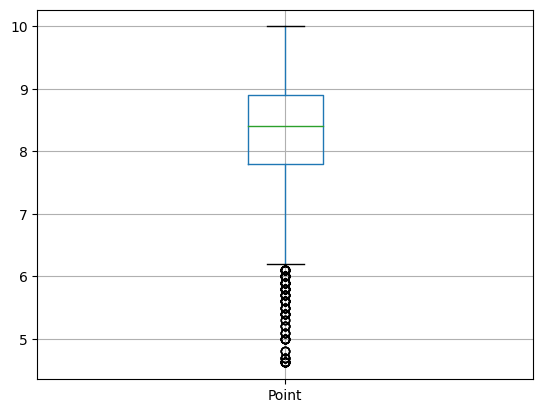

In [ ]:
figure=df.boxplot(column="Point")
print("mean:", df["Point"].mean())
print("upper-limit:", df.Point.mean() + 3*df.Point.std())
print("lower-limit:", df.Point.mean() - 3*df.Point.std())

In [ ]:
# chay 3
import statistics 
def computeDataNgoaiLe(data,random_state_index=0, isTest=False, train_parameter=[]):
  df = data.copy()
  def valueMeanStars():
    if (isTest): return train_parameter[0]
    return df['Stars'].dropna().mean()
  # print("mean", valueMean())

  def valueMedianStars():
    if (isTest): return train_parameter[1]
    return df['Stars'].dropna().median()
  # print("median", valueMedian())

  def valueModeStars():
    if (isTest): return train_parameter[2]
    return statistics.mode(df['Stars'].dropna())
  # print("mode", valueMode())

  def valueEndDistStars():
    if (isTest): return train_parameter[3]
    # gia tri o duoi cua phan bo (bien Stars theo phan bo chuan)
    extreme = df.Stars.mean() + 3*df.Stars.std() # extreme=73.27
    return extreme
  # print("enddist", valueEndDist())
  def valueAnyStars():
    if (isTest): return train_parameter[4]
    return 3
  def valueMeanDistance():
    if (isTest): return train_parameter[5]
    return df['Distance'].dropna().mean()
  # print("mean", valueMean())

  def valueMedianDistance():
    if (isTest): return train_parameter[6]
    return df['Distance'].dropna().median()
  # print("median", valueMedian())

  def valueModeDistance():
    if (isTest): return train_parameter[7]
    return statistics.mode(df['Distance'].dropna())
  # print("mode", valueMode())

  def valueEndDistDistance():
    if (isTest): return train_parameter[8]
    # gia tri o duoi cua phan bo (bien Age theo phan bo chuan)
    extreme = df.Distance.mean() + 3*df.Distance.std() # extreme=73.27
    return extreme
  # print("enddist", valueEndDist())
  def valueAnyDistance():
    if (isTest): return train_parameter[9]
    return 2
  # print("any", valueAny())
  df['Stars_Mean'] = df['Stars'].fillna(valueMeanStars())
  df['Stars_Median'] = df['Stars'].fillna(valueMedianStars())
  df['Stars_Mode'] = df['Stars'].fillna(valueModeStars())
  # random_samples = df['Stars'].dropna().sample(n=df['Stars'].isnull().sum(),random_state=
  # random_state_index)
  random_samples = df['Stars'].dropna().sample(n=min(df['Stars'].isnull().sum(), len(df['Stars'])),
                                             random_state=random_state_index, replace=True)
  random_samples.index = df[df['Stars'].isnull()].index
  df['Stars_Random']=df['Stars']
  df.loc[df['Stars'].isnull(), 'Stars_Random']=random_samples
  df['Stars_EndDist'] = df['Stars'].fillna(valueEndDistStars())
  df['Stars_Any'] = df['Stars'].fillna(valueAnyStars())
  df['Stars_NAN'] = df['Stars'].map(lambda x: 1 if pd.isna(x) else 0)

  df['Distance_Mean'] = df['Distance'].fillna(valueMeanDistance())
  df['Distance_Median'] = df['Distance'].fillna(valueMedianDistance())
  df['Distance_Mode'] = df['Distance'].fillna(valueModeDistance())
  # random_samples = df['Distance'].dropna().sample(n=df['Distance'].isnull().sum(),random_state=
  # random_state_index)
  random_samples = df['Distance'].dropna().sample(n=min(df['Distance'].isnull().sum(), len(df['Distance'])),
                                             random_state=random_state_index, replace=True)
  random_samples.index = df[df['Distance'].isnull()].index
  df['Distance_Random']=df['Distance']
  df.loc[df['Distance'].isnull(), 'Distance_Random']=random_samples
  df['Distance_EndDist'] = df['Distance'].fillna(valueEndDistDistance())
  df['Distance_Any'] = df['Distance'].fillna(valueAnyDistance())
  df['Distance_NAN'] = df['Distance'].map(lambda x: 1 if pd.isna(x) else 0)

  train_parameter.append(valueMeanStars())
  train_parameter.append(valueMedianStars())
  train_parameter.append(valueModeStars())
  train_parameter.append(valueEndDistStars())
  train_parameter.append(valueAnyStars())

  train_parameter.append(valueMeanDistance())
  train_parameter.append(valueMedianDistance())
  train_parameter.append(valueModeDistance())
  train_parameter.append(valueEndDistDistance())
  train_parameter.append(valueAnyDistance())

  #xử lí ngoại lệ
  if (isTest):
    df.loc[df['Price']>=train_parameter[10],'Price']=train_parameter[10]
    df.loc[df['Tax']>=train_parameter[11],'Tax']=train_parameter[11]
    df.loc[df['Distance']>=train_parameter[12],'Distance']=train_parameter[12]
    df.loc[df['Number_of_review']>=train_parameter[13],'Number_of_review']=train_parameter[13]
  else: 
    ##### Assuming Stars follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
    upper_Price=df['Price'].mean() + 3* df['Price'].std()
    upper_Tax=df['Tax'].mean() + 3* df['Tax'].std()
    upper_Distance=df['Distance'].mean() + 3* df['Distance'].std()
    upper_Number_of_review=df['Number_of_review'].mean() + 3* df['Number_of_review'].std()
    # print("lower", lower_boundary), print("upper", upper_boundary),print("mean", df['Stars'].mean())
    df.loc[df['Price']>=upper_Price,'Price']=upper_Price
    df.loc[df['Tax']>=upper_Tax,'Tax']=upper_Tax
    df.loc[df['Distance']>=upper_Distance,'Distance']=upper_Distance
    df.loc[df['Number_of_review']>=upper_Number_of_review,'Number_of_review']=upper_Number_of_review
    
    train_parameter.append(upper_Price)
    train_parameter.append(upper_Tax)
    train_parameter.append(upper_Distance)
    train_parameter.append(upper_Number_of_review)
  return [df, train_parameter]

df_copy = df.copy()
df_copy.drop(columns=['Name'], inplace=True)
[df_copy, params] = computeDataNgoaiLe(df_copy)
print(df_copy.info())
print("parameters: ", params)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            9486 non-null   object 
 1   Place              9486 non-null   object 
 2   Price              9486 non-null   float64
 3   Tax                9486 non-null   float64
 4   Stars              6178 non-null   float64
 5   Distance           8104 non-null   float64
 6   Number_of_review   9486 non-null   float64
 7   Sustainable_level  9486 non-null   int64  
 8   Discount           9486 non-null   int64  
 9   Free_Breakfast     9486 non-null   int64  
 10  is_Prepayment      9486 non-null   int64  
 11  is_NotablePlace    9486 non-null   int64  
 12  is_Free_Cancel     9486 non-null   int64  
 13  is_Sold_Out        9486 non-null   int64  
 14  Point              9486 non-null   float64
 15  Scope_point        9486 non-null   int64  
 16  Stars_Mean         9486 

In [ ]:
# chay 3
import statistics 
def computeData(data,random_state_index=0, isTest=False, train_parameter=[]):
  df = data.copy()
  def valueMeanStars():
    if (isTest): return train_parameter[0]
    return df['Stars'].dropna().mean()
  # print("mean", valueMean())

  def valueMedianStars():
    if (isTest): return train_parameter[1]
    return df['Stars'].dropna().median()
  # print("median", valueMedian())

  def valueModeStars():
    if (isTest): return train_parameter[2]
    return statistics.mode(df['Stars'].dropna())
  # print("mode", valueMode())

  def valueEndDistStars():
    if (isTest): return train_parameter[3]
    # gia tri o duoi cua phan bo (bien Stars theo phan bo chuan)
    extreme = df.Stars.mean() + 3*df.Stars.std() # extreme=73.27
    return extreme
  # print("enddist", valueEndDist())
  def valueAnyStars():
    if (isTest): return train_parameter[4]
    return 3
  def valueMeanDistance():
    if (isTest): return train_parameter[5]
    return df['Distance'].dropna().mean()
  # print("mean", valueMean())

  def valueMedianDistance():
    if (isTest): return train_parameter[6]
    return df['Distance'].dropna().median()
  # print("median", valueMedian())

  def valueModeDistance():
    if (isTest): return train_parameter[7]
    return statistics.mode(df['Distance'].dropna())
  # print("mode", valueMode())

  def valueEndDistDistance():
    if (isTest): return train_parameter[8]
    # gia tri o duoi cua phan bo (bien Age theo phan bo chuan)
    extreme = df.Distance.mean() + 3*df.Distance.std() # extreme=73.27
    return extreme
  # print("enddist", valueEndDist())
  def valueAnyDistance():
    if (isTest): return train_parameter[9]
    return 2
  # print("any", valueAny())
  df['Stars_Mean'] = df['Stars'].fillna(valueMeanStars())
  df['Stars_Median'] = df['Stars'].fillna(valueMedianStars())
  df['Stars_Mode'] = df['Stars'].fillna(valueModeStars())
  # random_samples = df['Stars'].dropna().sample(n=df['Stars'].isnull().sum(),random_state=
  # random_state_index)
  random_samples = df['Stars'].dropna().sample(n=min(df['Stars'].isnull().sum(), len(df['Stars'])),
                                             random_state=random_state_index, replace=True)
  random_samples.index = df[df['Stars'].isnull()].index
  df['Stars_Random']=df['Stars']
  df.loc[df['Stars'].isnull(), 'Stars_Random']=random_samples
  df['Stars_EndDist'] = df['Stars'].fillna(valueEndDistStars())
  df['Stars_Any'] = df['Stars'].fillna(valueAnyStars())
  df['Stars_NAN'] = df['Stars'].map(lambda x: 1 if pd.isna(x) else 0)

  df['Distance_Mean'] = df['Distance'].fillna(valueMeanDistance())
  df['Distance_Median'] = df['Distance'].fillna(valueMedianDistance())
  df['Distance_Mode'] = df['Distance'].fillna(valueModeDistance())
  # random_samples = df['Distance'].dropna().sample(n=df['Distance'].isnull().sum(),random_state=
  # random_state_index)
  random_samples = df['Distance'].dropna().sample(n=min(df['Distance'].isnull().sum(), len(df['Distance'])),
                                             random_state=random_state_index, replace=True)
  random_samples.index = df[df['Distance'].isnull()].index
  df['Distance_Random']=df['Distance']
  df.loc[df['Distance'].isnull(), 'Distance_Random']=random_samples
  df['Distance_EndDist'] = df['Distance'].fillna(valueEndDistDistance())
  df['Distance_Any'] = df['Distance'].fillna(valueAnyDistance())
  df['Distance_NAN'] = df['Distance'].map(lambda x: 1 if pd.isna(x) else 0)

  train_parameter.append(valueMeanStars())
  train_parameter.append(valueMedianStars())
  train_parameter.append(valueModeStars())
  train_parameter.append(valueEndDistStars())
  train_parameter.append(valueAnyStars())

  train_parameter.append(valueMeanDistance())
  train_parameter.append(valueMedianDistance())
  train_parameter.append(valueModeDistance())
  train_parameter.append(valueEndDistDistance())
  train_parameter.append(valueAnyDistance())

  return [df, train_parameter]

df_copy = df.copy()
df_copy.drop(columns=['Name'], inplace=True)
[df_copy, params] = computeData(df_copy)
print(df_copy.info())
print("parameters: ", params)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            9486 non-null   object 
 1   Place              9486 non-null   object 
 2   Price              9486 non-null   float64
 3   Tax                9486 non-null   float64
 4   Stars              6178 non-null   float64
 5   Distance           8104 non-null   float64
 6   Number_of_review   9486 non-null   int64  
 7   Sustainable_level  9486 non-null   int64  
 8   Discount           9486 non-null   int64  
 9   Free_Breakfast     9486 non-null   int64  
 10  is_Prepayment      9486 non-null   int64  
 11  is_NotablePlace    9486 non-null   int64  
 12  is_Free_Cancel     9486 non-null   int64  
 13  is_Sold_Out        9486 non-null   int64  
 14  Point              9486 non-null   float64
 15  Scope_point        9486 non-null   int64  
 16  Stars_Mean         9486 

In [ ]:
# chay 4
data = df.copy()
X= data.drop(['Name', 'Country', 'Place'], axis=1)
[X, params] = computeDataNgoaiLe(X)
# X.drop(columns=['Stars', 'Distance', 'Point', 'Stars_EndDist', 'Stars_Median', 'Stars_Mode',
#                 'Stars_Any', 'Stars_Random', 'Distance_EndDist', 'Distance_Median', 'Distance_Mode', 
#                 'Distance_Any', 'Distance_Random'], inplace = True)
X = X[['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']]
y= data['Point']

from sklearn.feature_selection import SelectKBest, f_classif
for k_val in range(1,15,1):
  kbest = SelectKBest(score_func=f_classif, k=k_val)
  kbest.fit(X, y)
  print(f'Selected {k_val} features by SelectKBest:', X.columns[kbest.get_support()].tolist())

Selected 1 features by SelectKBest: ['Sustainable_level']
Selected 2 features by SelectKBest: ['Price', 'Sustainable_level']
Selected 3 features by SelectKBest: ['Price', 'Sustainable_level', 'Free_Breakfast']
Selected 4 features by SelectKBest: ['Price', 'Sustainable_level', 'Stars_Mean', 'Free_Breakfast']
Selected 5 features by SelectKBest: ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast']
Selected 6 features by SelectKBest: ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast', 'is_Sold_Out']
Selected 7 features by SelectKBest: ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast', 'is_Prepayment', 'is_Sold_Out']
Selected 8 features by SelectKBest: ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Sold_Out']
Selected 9 features by SelectKBest: ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Free_Breakfast', 'is_Prepayment',

In [ ]:
# chay 6
from sklearn.model_selection import train_test_split
### Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
modelRegression = RandomForestRegressor(n_estimators=100, random_state=42)
LinearRegressionModel = LinearRegression() # Khởi tạo mô hình Linear Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # z-score

Ta có nhận xét: 
Các thuộc tính có tính quyết định giảm dần đến số điểm: 

Stars

Number_of_review

Price

Sustainable_level

Distance

Discount

Tax

In [ ]:
# lựa chọn phương pháp điều dữ liệu trống cho 'Stars', 'Distance'
# có nên xử lí ngoại lệ hay không trên 'Price', 'Tax', 'Distance', 'Number_of_review'

ppFillna = ['Mean', 'Median', 'Mode', 'Random', 'EndDist', 'Any']  # NAN sau 

cols = ['Price', 'Tax', 'Distance', 'Number_of_review', 'Stars', 'Point']

X=df[cols]
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

sum_accurancy = 0
for rand_state_index in range(10): 
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
  train_data = pd.concat([X_train, y_train], axis=1)
  [data, train_para] = computeDataNgoaiLe(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
  # print('data', data)
  cols1 = cols.copy()
  cols1.remove('Point')
  cols1.remove('Stars')
  cols1.remove('Distance')
  cols1 = cols1 + ['Stars_Mean'] + ['Stars_NAN']
  cols1 = cols1 + ['Distance_Mean'] + ['Distance_NAN']
  X_new= data[cols1]
  y_new= data['Point']

  test_data = pd.concat([X_test, y_test], axis=1)
  data_t = computeDataNgoaiLe(test_data, isTest=True, train_parameter=train_para)[0]
  X_new_t= data_t[cols1]
  y_new_t= data_t['Point']
  
  # print(X_new_scaled)
  # print(y_new)
  modelRegression.fit(X_new, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
  y_pred=modelRegression.predict(X_new_t) # dự báo biến target y của tập test dùng mô hình đã huấn luyện
  
  mse = mean_squared_error(y_new_t, y_pred)
  sum_accurancy += np.sqrt(mse)

sum_accurancy = sum_accurancy/10
print("Root_mean_squared_error with fillna Mean and NAN : {}".format(sum_accurancy))

for fillna in ppFillna:
  Stars_col = 'Stars_' + fillna
  Distance_col = 'Distance_' + fillna
  sum_accurancy = 0
  for rand_state_index in range(10): 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
    train_data = pd.concat([X_train, y_train], axis=1)
    [data, train_para] = computeDataNgoaiLe(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
    # print('data', data)
    cols1 = cols.copy()
    cols1 = [col.replace('Stars', Stars_col) for col in cols1]
    cols1 = [col.replace('Distance', Distance_col) for col in cols1]
    cols1.remove('Point')
    X_new= data[cols1]
    y_new= data['Point']

    test_data = pd.concat([X_test, y_test], axis=1)
    data_t = computeDataNgoaiLe(test_data, isTest=True, train_parameter=train_para)[0]
    X_new_t= data_t[cols1]
    y_new_t= data_t['Point']
    
    # print(X_new_scaled)
    # print(y_new)
    modelRegression.fit(X_new, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
    y_pred=modelRegression.predict(X_new_t) # dự báo biến target y của tập test dùng mô hình đã huấn luyện
    
    mse = mean_squared_error(y_new_t, y_pred)
    # mape = mean_absolute_percentage_error(y_new_t, y_pred)
    sum_accurancy += np.sqrt(mse)
    # sum_accurancy += mape

  sum_accurancy = sum_accurancy/10
  print("Root_mean_squared_error with fillna {} : {}".format(fillna, sum_accurancy))

Root_mean_squared_error with fillna Mean and NAN : 0.7522906120491245
Root_mean_squared_error with fillna Mean : 0.7528862831692937
Root_mean_squared_error with fillna Median : 0.7709474501845617
Root_mean_squared_error with fillna Mode : 0.7750206694056173
Root_mean_squared_error with fillna Random : 0.7827918307346131
Root_mean_squared_error with fillna EndDist : 0.7536173048803086
Root_mean_squared_error with fillna Any : 0.7710486465913297


In [ ]:
# lựa chọn phương pháp điều dữ liệu trống cho 'Stars', 'Distance'
# có nên xử lí ngoại lệ hay không trên 'Price', 'Tax', 'Distance', 'Number_of_review'

ppFillna = ['Mean', 'Median', 'Mode', 'Random', 'EndDist', 'Any']  # NAN sau 

cols = ['Price', 'Tax', 'Distance', 'Number_of_review', 'Stars', 'Point']

X=df[cols]
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

sum_accurancy = 0
for rand_state_index in range(10): 
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
  train_data = pd.concat([X_train, y_train], axis=1)
  [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
  # print('data', data)
  cols1 = cols.copy()
  cols1.remove('Point')
  cols1.remove('Stars')
  cols1.remove('Distance')
  cols1 = cols1 + ['Stars_Mean'] + ['Stars_NAN']
  cols1 = cols1 + ['Distance_Mean'] + ['Distance_NAN']
  X_new= data[cols1]
  y_new= data['Point']

  test_data = pd.concat([X_test, y_test], axis=1)
  data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
  X_new_t= data_t[cols1]
  y_new_t= data_t['Point']
  
  # print(X_new_scaled)
  # print(y_new)
  modelRegression.fit(X_new, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
  y_pred=modelRegression.predict(X_new_t) # dự báo biến target y của tập test dùng mô hình đã huấn luyện
  
  mse = mean_squared_error(y_new_t, y_pred)
  sum_accurancy += np.sqrt(mse)

sum_accurancy = sum_accurancy/10
print("Root_mean_squared_error with fillna Mean and NAN : {}".format(sum_accurancy))

for fillna in ppFillna:
  Stars_col = 'Stars_' + fillna
  Distance_col = 'Distance_' + fillna
  sum_accurancy = 0
  for rand_state_index in range(10): 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
    train_data = pd.concat([X_train, y_train], axis=1)
    [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
    # print('data', data)
    cols1 = cols.copy()
    cols1 = [col.replace('Stars', Stars_col) for col in cols1]
    cols1 = [col.replace('Distance', Distance_col) for col in cols1]
    cols1.remove('Point')
    X_new= data[cols1]
    y_new= data['Point']

    test_data = pd.concat([X_test, y_test], axis=1)
    data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
    X_new_t= data_t[cols1]
    y_new_t= data_t['Point']
    
    # print(X_new_scaled)
    # print(y_new)
    modelRegression.fit(X_new, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
    y_pred=modelRegression.predict(X_new_t) # dự báo biến target y của tập test dùng mô hình đã huấn luyện
    
    mse = mean_squared_error(y_new_t, y_pred)
    # mape = mean_absolute_percentage_error(y_new_t, y_pred)
    sum_accurancy += np.sqrt(mse)
    # sum_accurancy += mape
  sum_accurancy = sum_accurancy/10
  print("Root_mean_squared_error with fillna {} : {}".format(fillna, sum_accurancy))

Root_mean_squared_error with fillna Mean and NAN : 0.7517607274051643
Root_mean_squared_error with fillna Mean : 0.752666258891106
Root_mean_squared_error with fillna Median : 0.7709367000111399
Root_mean_squared_error with fillna Mode : 0.7745706091727194
Root_mean_squared_error with fillna Random : 0.7824175752383014
Root_mean_squared_error with fillna EndDist : 0.7531131115099265
Root_mean_squared_error with fillna Any : 0.7712668964262275


Thấp nhất là xử lí dữ liệu trống bằng Mean + NAN và không xử lí ngoại lệ: 0.7518 

Ta chọn phương pháp xử lí dữ liệu trống là Mean +NAN cho các thuộc tính Stars và Distanc đối với tập dữ liệu nhỏ.

Nếu tập dữ liệu lớn có thể giảm chiều bằng cách thay phương pháp dữ liệu trống bằng Mean vì hiệu xuất không giảm đáng kể (0.7527)

In [ ]:
# chay 5

from sklearn.preprocessing import StandardScaler # z-score
# zscore
def Zscore_train(X_new): 
  Scaler = StandardScaler()
  X_new_scaled = Scaler.fit_transform(X_new)
  X_new_scaled = pd.DataFrame(X_new_scaled, columns=X_new.columns)
  return X_new_scaled, Scaler

def Zscore_test(X_new_t, Scaler): 
  X_new_t_scaled = Scaler.transform(X_new_t)
  X_new_t_scaled = pd.DataFrame(X_new_t_scaled, columns=X_new_t.columns)
  return X_new_t_scaled

# minmax

from sklearn.preprocessing import MinMaxScaler
def MinMax_train(df):
  Scaler=MinMaxScaler()
  df_minmax=pd.DataFrame(Scaler.fit_transform(df),columns=df.columns)
  return df_minmax, Scaler
def MinMax_test(df, Scaler):
  df_minmax=pd.DataFrame(Scaler.transform(df),columns=df.columns)
  return df_minmax

# robust
from sklearn.preprocessing import RobustScaler
def Robust_train(df):
  Scaler=RobustScaler()
  df_robust_scaler=pd.DataFrame(Scaler.fit_transform(df),columns=df.columns)
  return df_robust_scaler, Scaler
def Robust_test(df, Scaler):
  df_robust_scaler=pd.DataFrame(Scaler.transform(df),columns=df.columns)
  return df_robust_scaler

# maxabs

from sklearn.preprocessing import MaxAbsScaler
def MaxAbs_train(df):
  Scaler=MaxAbsScaler()
  df_maxabs=pd.DataFrame(Scaler.fit_transform(df),columns=df.columns)
  return df_maxabs, Scaler
def MaxAbs_test(df, Scaler):
  df_maxabs=pd.DataFrame(Scaler.transform(df),columns=df.columns)
  return df_maxabs
# normal

from sklearn.preprocessing import Normalizer
def Normal_train(df):
  Scaler=Normalizer()
  df_normal=pd.DataFrame(Scaler.fit_transform(df),columns=df.columns)
  return df_normal, Scaler
def Normal_test(df, Scaler):
  df_normal=pd.DataFrame(Scaler.transform(df),columns=df.columns)
  return df_normal

# quantile

import numpy as np
from sklearn.preprocessing import QuantileTransformer
def Quantile_train(df):
  Scaler = QuantileTransformer(n_quantiles=623, random_state=0)  
  df_quantile=pd.DataFrame(Scaler.fit_transform(df),columns=df.columns)
  return df_quantile, Scaler
def Quantile_test(df, Scaler):
  df_quantile=pd.DataFrame(Scaler.transform(df),columns=df.columns)
  return df_quantile

# power

import numpy as np
from sklearn.preprocessing import PowerTransformer
def Power_train(df):
  Scaler=PowerTransformer()
  df_power=pd.DataFrame(Scaler.fit_transform(df),columns=df.columns)
  return df_power, Scaler
def Power_test(df, Scaler):
  df_power=pd.DataFrame(Scaler.transform(df),columns=df.columns)
  return df_power

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            9486 non-null   object 
 1   Place              9486 non-null   object 
 2   Name               9486 non-null   object 
 3   Price              9486 non-null   float64
 4   Tax                9486 non-null   float64
 5   Stars              6178 non-null   float64
 6   Distance           8104 non-null   float64
 7   Number_of_review   9486 non-null   int64  
 8   Sustainable_level  9486 non-null   int64  
 9   Discount           9486 non-null   int64  
 10  Free_Breakfast     9486 non-null   int64  
 11  is_Prepayment      9486 non-null   int64  
 12  is_NotablePlace    9486 non-null   int64  
 13  is_Free_Cancel     9486 non-null   int64  
 14  is_Sold_Out        9486 non-null   int64  
 15  Point              9486 non-null   float64
 16  Scope_point        9486 

In [ ]:
import seaborn as sns

<Axes: xlabel='Point', ylabel='Count'>

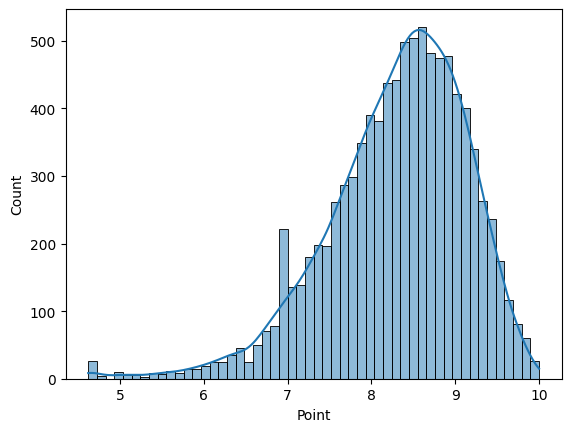

In [ ]:
sns.histplot(df['Point'].dropna(), kde = True)

In [ ]:
import math
# tạo cột chia khoảng cho point
df['Scope_point'] = df['Point'].apply(lambda x: math.ceil(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            9486 non-null   object 
 1   Place              9486 non-null   object 
 2   Name               9486 non-null   object 
 3   Price              9486 non-null   float64
 4   Tax                9486 non-null   float64
 5   Stars              6178 non-null   float64
 6   Distance           8104 non-null   float64
 7   Number_of_review   9486 non-null   int64  
 8   Sustainable_level  9486 non-null   int64  
 9   Discount           9486 non-null   int64  
 10  Free_Breakfast     9486 non-null   int64  
 11  is_Prepayment      9486 non-null   int64  
 12  is_NotablePlace    9486 non-null   int64  
 13  is_Free_Cancel     9486 non-null   int64  
 14  is_Sold_Out        9486 non-null   int64  
 15  Point              9486 non-null   float64
 16  Scope_point        9486 

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# không chuẩn hoá

X=df.drop(columns=['Name', 'Scope_point', 'Country', 'Place'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

# cols = ['Number_of_review', 'Stars_Mean', 'Sustainable_level', 'Distance_Mean', 'Price', 'Tax', 'Discount']
# cols = ['Price', 'Number_of_review', 'Sustainable_level', 'Discount', 'Free_Breakfast', 'is_Prepayment', 
#         'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out', 'Stars_Mean', 'Stars_NAN', 'Distance_NAN']
# 6 thuộc tính
# cols = ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast', 'is_Sold_Out']

# # 10 thuộc tính
# cols = ['Price', 'Number_of_review', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 
#         'Distance_Mean', 'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Sold_Out']

# 14 thuộc tính
cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']
sum_accurancy = 0
for rand_state_index in range(10): 
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
  train_data = pd.concat([X_train, y_train], axis=1)
  [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
  # print('data', data)
  X_new= data[cols]
  y_new= data['Point']

  test_data = pd.concat([X_test, y_test], axis=1)
  data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
  X_new_t= data_t[cols]
  y_new_t= data_t['Point']
  
  # print(X_new_scaled)
  # print(y_new)
  modelRegression.fit(X_new, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
  y_pred=modelRegression.predict(X_new_t) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

  # vẽ đồ thị so sanh giá trị predict và giá trị đúng
  
  # Vẽ biểu đồ đường
  # plt.plot(range(50),y_new_t[0:50], label='Ground truth')
  # plt.plot(range(50),y_pred[0:50], label='Prediction')
  # plt.xlabel('Samples')
  # plt.ylabel('Target value')
  # plt.legend()
  # plt.show()

  # In ra kết quả dự đoán và giá trị thực tế
  # for i in range(len(y_pred)):
  #   print("Predicted: {:.2f}, Actual: {:.2f}".format(y_pred[i], y_new_t.iloc[i]))
  mse = mean_squared_error(y_new_t, y_pred)
  # mape = mean_absolute_percentage_error(y_new_t, y_pred)
  sum_accurancy += np.sqrt(mse)
  # sum_accurancy += mape
  # print("Mean squared error with {} : {}".format(chuanhoa, mse))

  # from sklearn.metrics import r2_score
  # # Đánh giá mô hình trên tập kiểm tra sử dụng R2 score
  # r2 = r2_score(y_test, y_pred)
  # print("R2 Score:", r2)

  # from sklearn.metrics import mean_absolute_error
  # # Đánh giá mô hình trên tập kiểm tra sử dụng MAE
  # mae = mean_absolute_error(y_test, y_pred)
  # print("Mean Absolute Error (MAE):", mae)

sum_accurancy = sum_accurancy/10
print("Root_mean_squared_error với không chuẩn hoá : {}".format(sum_accurancy))
# kq: Root_mean_squared_error with zscore : 0.7080163391312847
# kq: Mean_absolute_percentage_error with zscore : 0.0683114068732015

Root_mean_squared_error với không chuẩn hoá : 0.7078753397597444


In [ ]:
# chọn phương pháp chuẩn hoá dữ liệu cho tất cả các thuộc tính
# chạy 7 new
ChuanHoas = ['zscore', 'minmax', 'robust', 'maxabs', 'normalize', 'quantile', 'power']

X=df.drop(columns=['Name', 'Scope_point', 'Country', 'Place'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

# cols = ['Number_of_review', 'Stars_Mean', 'Sustainable_level', 'Distance_Mean', 'Price', 'Tax', 'Discount']
# cols = ['Price', 'Number_of_review', 'Sustainable_level', 'Discount', 'Free_Breakfast', 'is_Prepayment', 
#         'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out', 'Stars_Mean', 'Stars_NAN', 'Distance_NAN']
# 6 thuộc tính
# cols = ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast', 'is_Sold_Out']

# # 10 thuộc tính
# cols = ['Price', 'Number_of_review', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 
#         'Distance_Mean', 'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Sold_Out']

# 14 thuộc tính
cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']

for chuanhoa in ChuanHoas: 
  sum_accurancy = 0
  for rand_state_index in range(10): 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
    train_data = pd.concat([X_train, y_train], axis=1)
    [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
    # print('data', data)
    X_new= data[cols]
    # goi ham chuan hoa
    if chuanhoa == 'zscore': 
      X_new_scaled, Scaler = Zscore_train(X_new)
    elif chuanhoa == 'minmax':
      X_new_scaled, Scaler = MinMax_train(X_new)
    elif chuanhoa == 'robust':
      X_new_scaled, Scaler = Robust_train(X_new)
    elif chuanhoa == 'maxabs':
      X_new_scaled, Scaler = MaxAbs_train(X_new)
    elif chuanhoa == 'normalize':
      X_new_scaled, Scaler = Normal_train(X_new)
    elif chuanhoa == 'quantile':
      X_new_scaled, Scaler = Quantile_train(X_new)
    elif chuanhoa == 'power': 
      X_new_scaled, Scaler = Power_train(X_new)

    y_new= data['Point']

    test_data = pd.concat([X_test, y_test], axis=1)
    data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
    X_new_t= data_t[cols]
    # goi ham chua hoa cho test 
    if chuanhoa == 'zscore': 
      X_new_t_scaled = Zscore_test(X_new_t, Scaler)
    elif chuanhoa == 'minmax':
      X_new_t_scaled = MinMax_test(X_new_t, Scaler)
    elif chuanhoa == 'robust':
      X_new_t_scaled = Robust_test(X_new_t, Scaler)
    elif chuanhoa == 'maxabs':
      X_new_t_scaled = MaxAbs_test(X_new_t, Scaler)
    elif chuanhoa == 'normalize':
      X_new_t_scaled = Normal_test(X_new_t, Scaler)
    elif chuanhoa == 'quantile':
      X_new_t_scaled = Quantile_test(X_new_t, Scaler)
    elif chuanhoa == 'power': 
      X_new_t_scaled = Power_test(X_new_t, Scaler)
    y_new_t= data_t['Point']
    
    # print(X_new_scaled)
    # print(y_new)
    modelRegression.fit(X_new_scaled, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
    y_pred=modelRegression.predict(X_new_t_scaled) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

    # vẽ đồ thị so sanh giá trị predict và giá trị đúng
    
    # Vẽ biểu đồ đường
    # plt.plot(range(50),y_new_t[0:50], label='Ground truth')
    # plt.plot(range(50),y_pred[0:50], label='Prediction')
    # plt.xlabel('Samples')
    # plt.ylabel('Target value')
    # plt.legend()
    # plt.show()

    # In ra kết quả dự đoán và giá trị thực tế
    # for i in range(len(y_pred)):
    #   print("Predicted: {:.2f}, Actual: {:.2f}".format(y_pred[i], y_new_t.iloc[i]))
    mse = mean_squared_error(y_new_t, y_pred)
    # mape = mean_absolute_percentage_error(y_new_t, y_pred)
    sum_accurancy += np.sqrt(mse)
    # sum_accurancy += mape
    # print("Mean squared error with {} : {}".format(chuanhoa, mse))

    # from sklearn.metrics import r2_score
    # # Đánh giá mô hình trên tập kiểm tra sử dụng R2 score
    # r2 = r2_score(y_test, y_pred)
    # print("R2 Score:", r2)

    # from sklearn.metrics import mean_absolute_error
    # # Đánh giá mô hình trên tập kiểm tra sử dụng MAE
    # mae = mean_absolute_error(y_test, y_pred)
    # print("Mean Absolute Error (MAE):", mae)

  sum_accurancy = sum_accurancy/10
  print("Root_mean_squared_error with {} : {}".format(chuanhoa, sum_accurancy))
# kq: Root_mean_squared_error with zscore : 0.7080163391312847
# kq: Mean_absolute_percentage_error with zscore : 0.0683114068732015

Root_mean_squared_error with zscore : 0.7079049172192814
Root_mean_squared_error with minmax : 0.7079042683500022
Root_mean_squared_error with robust : 0.7080319420975877
Root_mean_squared_error with maxabs : 0.7078466926253265
Root_mean_squared_error with normalize : 0.714463781431924
Root_mean_squared_error with quantile : 0.73849620097506
Root_mean_squared_error with power : 0.7080315676355051


Như vậy đối với 14 thuộc tính được chọn thì việc chuẩn hoá không cãi thiện quá nhiều hiệu suất quá nhiều.

Hiệu xuất tốt nhất trong các phương pháp chuẩn hoá là sử dụng MaxAbs với rmse = 0.7078466926253265

14 thuộc tính => 35s => 0.708

10 thuộc tính => 30s => 0.735

6 thuộc tính => 24s => 0.833

In [ ]:
# không chuẩn hoá

X=df.drop(columns=['Name', 'Scope_point', 'Country', 'Place'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

# 14 thuộc tính
cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']
sum_accurancy = 0
for rand_state_index in range(10): 
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
  train_data = pd.concat([X_train, y_train], axis=1)
  [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
  # print('data', data)
  X_new= data[cols]
  y_new= data['Point']

  test_data = pd.concat([X_test, y_test], axis=1)
  data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
  X_new_t= data_t[cols]
  y_new_t= data_t['Point']
  
  # print(X_new_scaled)
  # print(y_new)
  LinearRegressionModel.fit(X_new, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
  y_pred=LinearRegressionModel.predict(X_new_t) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

  # vẽ đồ thị so sanh giá trị predict và giá trị đúng
  
  # Vẽ biểu đồ đường
  # plt.plot(range(50),y_new_t[0:50], label='Ground truth')
  # plt.plot(range(50),y_pred[0:50], label='Prediction')
  # plt.xlabel('Samples')
  # plt.ylabel('Target value')
  # plt.legend()
  # plt.show()

  # In ra kết quả dự đoán và giá trị thực tế
  # for i in range(len(y_pred)):
  #   print("Predicted: {:.2f}, Actual: {:.2f}".format(y_pred[i], y_new_t.iloc[i]))
  mse = mean_squared_error(y_new_t, y_pred)
  # mape = mean_absolute_percentage_error(y_new_t, y_pred)
  sum_accurancy += np.sqrt(mse)
  # sum_accurancy += mape
sum_accurancy = sum_accurancy/10
print("Linear Regression: ")
print("Root_mean_squared_error với không chuẩn hoá : {}".format(sum_accurancy))

Linear Regression: 
Root_mean_squared_error với không chuẩn hoá : 0.7352072836256325


In [ ]:
# chọn phương pháp chuẩn hoá dữ liệu cho tất cả các thuộc tính
# chạy 7 new
ChuanHoas = ['zscore', 'minmax', 'robust', 'maxabs', 'normalize', 'quantile', 'power']

X=df.drop(columns=['Name', 'Scope_point', 'Country', 'Place'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

# cols = ['Number_of_review', 'Stars_Mean', 'Sustainable_level', 'Distance_Mean', 'Price', 'Tax', 'Discount']
# cols = ['Price', 'Number_of_review', 'Sustainable_level', 'Discount', 'Free_Breakfast', 'is_Prepayment', 
#         'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out', 'Stars_Mean', 'Stars_NAN', 'Distance_NAN']
# 6 thuộc tính
# cols = ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast', 'is_Sold_Out']

# # 10 thuộc tính
# cols = ['Price', 'Number_of_review', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 
#         'Distance_Mean', 'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Sold_Out']

# 14 thuộc tính
cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']

for chuanhoa in ChuanHoas: 
  sum_accurancy = 0
  for rand_state_index in range(10): 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
    train_data = pd.concat([X_train, y_train], axis=1)
    [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
    # print('data', data)
    X_new= data[cols]
    # goi ham chuan hoa
    if chuanhoa == 'zscore': 
      X_new_scaled, Scaler = Zscore_train(X_new)
    elif chuanhoa == 'minmax':
      X_new_scaled, Scaler = MinMax_train(X_new)
    elif chuanhoa == 'robust':
      X_new_scaled, Scaler = Robust_train(X_new)
    elif chuanhoa == 'maxabs':
      X_new_scaled, Scaler = MaxAbs_train(X_new)
    elif chuanhoa == 'normalize':
      X_new_scaled, Scaler = Normal_train(X_new)
    elif chuanhoa == 'quantile':
      X_new_scaled, Scaler = Quantile_train(X_new)
    elif chuanhoa == 'power': 
      X_new_scaled, Scaler = Power_train(X_new)

    y_new= data['Point']

    test_data = pd.concat([X_test, y_test], axis=1)
    data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
    X_new_t= data_t[cols]
    # goi ham chua hoa cho test 
    if chuanhoa == 'zscore': 
      X_new_t_scaled = Zscore_test(X_new_t, Scaler)
    elif chuanhoa == 'minmax':
      X_new_t_scaled = MinMax_test(X_new_t, Scaler)
    elif chuanhoa == 'robust':
      X_new_t_scaled = Robust_test(X_new_t, Scaler)
    elif chuanhoa == 'maxabs':
      X_new_t_scaled = MaxAbs_test(X_new_t, Scaler)
    elif chuanhoa == 'normalize':
      X_new_t_scaled = Normal_test(X_new_t, Scaler)
    elif chuanhoa == 'quantile':
      X_new_t_scaled = Quantile_test(X_new_t, Scaler)
    elif chuanhoa == 'power': 
      X_new_t_scaled = Power_test(X_new_t, Scaler)
    y_new_t= data_t['Point']
    
    # print(X_new_scaled)
    # print(y_new)
    LinearRegressionModel.fit(X_new_scaled, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
    y_pred=LinearRegressionModel.predict(X_new_t_scaled) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

    # vẽ đồ thị so sanh giá trị predict và giá trị đúng
    
    # Vẽ biểu đồ đường
    # plt.plot(range(50),y_new_t[0:50], label='Ground truth')
    # plt.plot(range(50),y_pred[0:50], label='Prediction')
    # plt.xlabel('Samples')
    # plt.ylabel('Target value')
    # plt.legend()
    # plt.show()

    # In ra kết quả dự đoán và giá trị thực tế
    # for i in range(len(y_pred)):
    #   print("Predicted: {:.2f}, Actual: {:.2f}".format(y_pred[i], y_new_t.iloc[i]))
    mse = mean_squared_error(y_new_t, y_pred)
    # mape = mean_absolute_percentage_error(y_new_t, y_pred)
    sum_accurancy += np.sqrt(mse)
    # sum_accurancy += mape

  sum_accurancy = sum_accurancy/10
  print("Root_mean_squared_error with {} : {}".format(chuanhoa, sum_accurancy))

Root_mean_squared_error with zscore : 0.7352072836256328
Root_mean_squared_error with minmax : 0.7352072836256328
Root_mean_squared_error with robust : 0.7352072836256328
Root_mean_squared_error with maxabs : 0.7352072836256328
Root_mean_squared_error with normalize : 0.7362718055015882
Root_mean_squared_error with quantile : 0.7168825536416741
Root_mean_squared_error with power : 0.714216039770968


Đối với Linear Regression thì chuẩn hoá mang lại hiệu quả khá đáng kể. 

Hiệu xuất tốt nhất trong các phương pháp chuẩn hoá là sử dụng PowerTransformer với rmse = 0.714216039770968

In [ ]:
# # các metric đánh giá 
# from sklearn.metrics import mean_absolute_error, r2_score

# # đánh giá trên tập train
# train_predictions = model.predict(X_train)
# mae_train = mean_absolute_error(y_train, train_predictions)
# r2_train = r2_score(y_train, train_predictions)

# # đánh giá trên tập test
# test_predictions = model.predict(X_test)
# mae_test = mean_absolute_error(y_test, test_predictions)
# r2_test = r2_score(y_test, test_predictions)

# print(f"MAE on train set: {mae_train:.2f}")
# print(f"MAE on test set: {mae_test:.2f}")
# print(f"R2 on train set: {r2_train:.2f}")
# print(f"R2 on test set: {r2_test:.2f}")

In [ ]:
# chay 7
from sklearn.decomposition import PCA
ChuanHoas = ['zscore', 'maxabs', 'power']
ppFillna = ['Mean', 'Median', 'Mode', 'Random', 'EndDist', 'Any', 'NAN']

X=df.drop(columns=['Name', 'Scope_point'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']
# for pp in ppFillna: 

for chuanhoa in ChuanHoas: 
  sum_accurancy = 0
  for rand_state_index in range(10): 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
    train_data = pd.concat([X_train, y_train], axis=1)
    [data, train_para] = computeDataNgoaiLe(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
    # print('data', data)
    X_new= data[cols]
    # goi ham chuan hoa
    if chuanhoa == 'zscore': 
      X_new_scaled, Scaler = Zscore_train(X_new)
    elif chuanhoa == 'minmax':
      X_new_scaled, Scaler = MinMax_train(X_new)
    elif chuanhoa == 'robust':
      X_new_scaled, Scaler = Robust_train(X_new)
    elif chuanhoa == 'maxabs':
      X_new_scaled, Scaler = MaxAbs_train(X_new)
    elif chuanhoa == 'normalize':
      X_new_scaled, Scaler = Normal_train(X_new)
    elif chuanhoa == 'quantile':
      X_new_scaled, Scaler = Quantile_train(X_new)
    elif chuanhoa == 'power': 
      X_new_scaled, Scaler = Power_train(X_new)

    y_new= data['Point']

    test_data = pd.concat([X_test, y_test], axis=1)
    data_t = computeDataNgoaiLe(test_data, isTest=True, train_parameter=train_para)[0]
    X_new_t= data_t[cols]
    # goi ham chua hoa cho test 
    if chuanhoa == 'zscore': 
      X_new_t_scaled = Zscore_test(X_new_t, Scaler)
    elif chuanhoa == 'minmax':
      X_new_t_scaled = MinMax_test(X_new_t, Scaler)
    elif chuanhoa == 'robust':
      X_new_t_scaled = Robust_test(X_new_t, Scaler)
    elif chuanhoa == 'maxabs':
      X_new_t_scaled = MaxAbs_test(X_new_t, Scaler)
    elif chuanhoa == 'normalize':
      X_new_t_scaled = Normal_test(X_new_t, Scaler)
    elif chuanhoa == 'quantile':
      X_new_t_scaled = Quantile_test(X_new_t, Scaler)
    elif chuanhoa == 'power': 
      X_new_t_scaled = Power_test(X_new_t, Scaler)
    y_new_t= data_t['Point']
    
    # print(X_new_scaled)
    # print(y_new)

    # Khởi tạo mô hình PCA với số thành phần chính mong muốn
    n_components = 6
    pca = PCA(n_components=n_components)

    # Thực hiện phân tích thành phần chính và giảm chiều dữ liệu
    X_train_pca = pca.fit_transform(X_new_scaled)
    X_test_pca = pca.transform(X_new_t_scaled)


    modelRegression.fit(X_train_pca, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
    y_pred=modelRegression.predict(X_test_pca) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

    # vẽ đồ thị so sanh giá trị predict và giá trị đúng
    
    # # Vẽ biểu đồ đường
    # plt.plot(range(100),y_new_t[0:100], label='Ground truth')
    # plt.plot(range(100),y_pred[0:100], label='Prediction')
    # plt.xlabel('Samples')
    # plt.ylabel('Target value')
    # plt.legend()
    # plt.show()

    # In ra kết quả dự đoán và giá trị thực tế
    # for i in range(len(y_pred)):
    #   print("Predicted: {:.2f}, Actual: {:.2f}".format(y_pred[i], y_new_t.iloc[i]))
    mse = mean_squared_error(y_new_t, y_pred)
    sum_accurancy += np.sqrt(mse)
    # print("Mean squared error with {} : {}".format(chuanhoa, mse))

  sum_accurancy = sum_accurancy/10
  print("Mean squared error with {} : {}".format(chuanhoa, sum_accurancy))

Mean squared error with zscore : 0.735858956811411
Mean squared error with maxabs : 0.7556745266491887
Mean squared error with power : 0.7285969775500984


In [ ]:
# Chọn lựa đặc trưng bằng K best

In [ ]:
# chọn phương pháp chuẩn hoá dữ liệu cho tất cả các thuộc tính
# chạy 7 new
ChuanHoas = ['maxabs', 'power']

X=df.drop(columns=['Name', 'Scope_point', 'Country', 'Place'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

# 6 thuộc tính
cols = ['Price', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 'Free_Breakfast', 'is_Sold_Out']

# # 10 thuộc tính
# cols = ['Price', 'Number_of_review', 'Sustainable_level', 'Stars_Mean', 'Stars_NAN', 
#         'Distance_Mean', 'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Sold_Out']

# # 14 thuộc tính
# cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
#         'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']

for chuanhoa in ChuanHoas: 
  sum_accurancy = 0
  for rand_state_index in range(10): 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
    train_data = pd.concat([X_train, y_train], axis=1)
    [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
    # print('data', data)
    X_new= data[cols]
    # goi ham chuan hoa
    if chuanhoa == 'zscore': 
      X_new_scaled, Scaler = Zscore_train(X_new)
    elif chuanhoa == 'minmax':
      X_new_scaled, Scaler = MinMax_train(X_new)
    elif chuanhoa == 'robust':
      X_new_scaled, Scaler = Robust_train(X_new)
    elif chuanhoa == 'maxabs':
      X_new_scaled, Scaler = MaxAbs_train(X_new)
    elif chuanhoa == 'normalize':
      X_new_scaled, Scaler = Normal_train(X_new)
    elif chuanhoa == 'quantile':
      X_new_scaled, Scaler = Quantile_train(X_new)
    elif chuanhoa == 'power': 
      X_new_scaled, Scaler = Power_train(X_new)

    y_new= data['Point']

    test_data = pd.concat([X_test, y_test], axis=1)
    data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
    X_new_t= data_t[cols]
    # goi ham chua hoa cho test 
    if chuanhoa == 'zscore': 
      X_new_t_scaled = Zscore_test(X_new_t, Scaler)
    elif chuanhoa == 'minmax':
      X_new_t_scaled = MinMax_test(X_new_t, Scaler)
    elif chuanhoa == 'robust':
      X_new_t_scaled = Robust_test(X_new_t, Scaler)
    elif chuanhoa == 'maxabs':
      X_new_t_scaled = MaxAbs_test(X_new_t, Scaler)
    elif chuanhoa == 'normalize':
      X_new_t_scaled = Normal_test(X_new_t, Scaler)
    elif chuanhoa == 'quantile':
      X_new_t_scaled = Quantile_test(X_new_t, Scaler)
    elif chuanhoa == 'power': 
      X_new_t_scaled = Power_test(X_new_t, Scaler)
    y_new_t= data_t['Point']
    
    # print(X_new_scaled)
    # print(y_new)
    modelRegression.fit(X_new_scaled, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
    y_pred=modelRegression.predict(X_new_t_scaled) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

    # vẽ đồ thị so sanh giá trị predict và giá trị đúng
    
    # Vẽ biểu đồ đường
    # plt.plot(range(50),y_new_t[0:50], label='Ground truth')
    # plt.plot(range(50),y_pred[0:50], label='Prediction')
    # plt.xlabel('Samples')
    # plt.ylabel('Target value')
    # plt.legend()
    # plt.show()

    # In ra kết quả dự đoán và giá trị thực tế
    # for i in range(len(y_pred)):
    #   print("Predicted: {:.2f}, Actual: {:.2f}".format(y_pred[i], y_new_t.iloc[i]))
    mse = mean_squared_error(y_new_t, y_pred)
    # mape = mean_absolute_percentage_error(y_new_t, y_pred)
    sum_accurancy += np.sqrt(mse)
    # sum_accurancy += mape
    # print("Mean squared error with {} : {}".format(chuanhoa, mse))

    # from sklearn.metrics import r2_score
    # # Đánh giá mô hình trên tập kiểm tra sử dụng R2 score
    # r2 = r2_score(y_test, y_pred)
    # print("R2 Score:", r2)

    # from sklearn.metrics import mean_absolute_error
    # # Đánh giá mô hình trên tập kiểm tra sử dụng MAE
    # mae = mean_absolute_error(y_test, y_pred)
    # print("Mean Absolute Error (MAE):", mae)

  sum_accurancy = sum_accurancy/10
  print("Root_mean_squared_error with {} : {}".format(chuanhoa, sum_accurancy))
# kq: Root_mean_squared_error with zscore : 0.7080163391312847
# kq: Mean_absolute_percentage_error with zscore : 0.0683114068732015

Root_mean_squared_error with maxabs : 0.8340807485066651
Root_mean_squared_error with power : 0.8338106361157882


Như vậy việc lựa chọn đặc trưng bằng Kbest sẽ cho độ chính xác giảm đi đáng kể so với việc giảm chiều dữ liệu bằng PCA.

Tuy nhiên PCA mất nhiều thời gian cho việc huấn luyện phân tích thành phần chính và giảm chiều dữ liệu. 

=> Cần phải cân nhắc về thời gian để chọn phương pháp giảm chiều cho phù hợp.

Nhóm chọn 2 mô hình để huấn luyện là Linear Regression và Random Forest Regression.

Vì Linear Regression không có các tham số để thực hiện huấn luyện mô hình nên trực tiếp tính hiệu suất của tập test và so sánh ngay với hiệu suất của tập validate.

Đối với Random Forest Regression thì sẽ thực hiên huấn luyện mô hình trên các siêu tham số 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', và 'max_features' và đối chiếu với tập test dựa trên các siêu tham số trên.

In [ ]:
# Huấn luyện Linear Regression 

X=df.drop(columns=['Name', 'Scope_point', 'Country', 'Place'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

# 14 thuộc tính
cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']
sum_accurancy_validate = 0
sum_accurancy_test = 0

for rand_state_index in range(10): 
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
  X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.33, random_state=rand_state_index)

  train_data = pd.concat([X_train, y_train], axis=1)
  [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
  # print('data', data)
  X_new= data[cols]
  # goi ham chuan hoa
  X_new_scaled, Scaler = Power_train(X_new)
  y_new= data['Point']

  validate_data = pd.concat([X_validate, y_validate], axis=1)
  data_v = computeData(validate_data, isTest=True, train_parameter=train_para)[0]
  X_new_v= data_v[cols]
  # goi ham chuan hoa
  X_new_v_scaled = Power_test(X_new_v, Scaler)
  y_new_v= data_v['Point']
  
  # print(X_new_scaled)
  # print(y_new)
  LinearRegressionModel.fit(X_new_scaled, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
  y_pred_v=LinearRegressionModel.predict(X_new_v_scaled) # dự báo biến target y của tập test dùng mô hình đã huấn luyện


  test_data = pd.concat([X_test, y_test], axis=1)
  data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
  X_new_t= data_t[cols]
  # goi ham chuan hoa
  X_new_t_scaled = Power_test(X_new_t, Scaler)
  y_new_t= data_t['Point']

  y_pred_t=LinearRegressionModel.predict(X_new_t_scaled) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

  # vẽ đồ thị so sanh giá trị predict và giá trị đúng
  # Vẽ biểu đồ đường
  # plt.plot(range(50),y_new_v[0:50], label='Ground truth')
  # plt.plot(range(50),y_pred[0:50], label='Prediction')
  # plt.xlabel('Samples')
  # plt.ylabel('Target value')
  # plt.legend()
  # plt.show()

  mse_v = mean_squared_error(y_new_v, y_pred_v)
  # mape = mean_absolute_percentage_error(y_new_v, y_pred)
  sum_accurancy_validate += np.sqrt(mse_v)
  # sum_accurancy_validate += mape

  mse_t = mean_squared_error(y_new_t, y_pred_t)
  sum_accurancy_test += np.sqrt(mse_t)

sum_accurancy_validate = sum_accurancy_validate/10
sum_accurancy_test = sum_accurancy_test/10

print("Root_mean_squared_error with validate set : {}".format( sum_accurancy_validate))
print("Root_mean_squared_error with validate set : {}".format( sum_accurancy_test))

Root_mean_squared_error with validate set : 0.7085657750915076
Root_mean_squared_error with validate set : 0.7166886439425328


In [ ]:
# Huấn luyện Random Forest Regression

X=df.drop(columns=['Name', 'Scope_point', 'Country', 'Place'])
y=df['Scope_point']
# X.head(10)
array_results = []
results = []

# 14 thuộc tính
cols = ['Price', 'Tax', 'Number_of_review', 'Sustainable_level', 'Discount', 'Stars_Mean', 'Stars_NAN', 'Distance_Mean', 'Distance_NAN',
        'Free_Breakfast', 'is_Prepayment', 'is_NotablePlace', 'is_Free_Cancel', 'is_Sold_Out']

sum_accurancy = 0
for rand_state_index in range(10): 
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=rand_state_index, stratify=y)
  X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.33, random_state=rand_state_index)
  train_data = pd.concat([X_train, y_train], axis=1)
  [data, train_para] = computeData(train_data)   # thêm xử lí ngoại lệ +  trường Age_EndDist
  # print('data', data)
  X_new= data[cols]
  X_new_scaled, Scaler = MaxAbs_train(X_new)
  y_new= data['Point']

  validate_data = pd.concat([X_validate, y_validate], axis=1)
  data_v = computeData(validate_data, isTest=True, train_parameter=train_para)[0]
  X_new_v= data_v[cols]
  # goi ham chuan hoa
  X_new_v_scaled = Power_test(X_new_v, Scaler)
  y_new_v= data_v['Point']
  
  # print(X_new_scaled)
  # print(y_new)
  modelRegression.fit(X_new_scaled, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
  y_pred_v=modelRegression.predict(X_new_v_scaled) # dự báo biến target y của tập test dùng mô hình đã huấn luyện


  test_data = pd.concat([X_test, y_test], axis=1)
  data_t = computeData(test_data, isTest=True, train_parameter=train_para)[0]
  X_new_t= data_t[cols]
  # goi ham chuan hoa
  X_new_t_scaled = Power_test(X_new_t, Scaler)
  y_new_t= data_t['Point']

  y_pred_t=modelRegression.predict(X_new_t_scaled) # dự báo biến target y của tập test dùng mô hình đã huấn luyện

  mse_v = mean_squared_error(y_new_v, y_pred_v)
  # mape = mean_absolute_percentage_error(y_new_v, y_pred)
  sum_accurancy_validate += np.sqrt(mse_v)
  # sum_accurancy_validate += mape

  mse_t = mean_squared_error(y_new_t, y_pred_t)
  sum_accurancy_test += np.sqrt(mse_t)

sum_accurancy_validate = sum_accurancy_validate/10
sum_accurancy_test = sum_accurancy_test/10

print("Root_mean_squared_error with validate set : {}".format( sum_accurancy_validate))
print("Root_mean_squared_error with validate set : {}".format( sum_accurancy_test))

Root_mean_squared_error with validate set : 0.773306123225319
Root_mean_squared_error with validate set : 0.7817142924363721
